In [5]:
import os

class SentenceCorpus(object):

    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        with open(self.filename, "r") as i:
            for line in i:
                tokens = line.strip().split()
                yield tokens
                
from google.colab import drive
drive.mount('/content/gdrive') 
#FILE=open('/content/gdrive/My Drive/Colab Notebooks/Lab1/H0.txt', 'r')               
FILE = os.path.join("", '/content/gdrive/My Drive/Colab Notebooks/Lab1/H0.txt')
sentences = SentenceCorpus(FILE)
files = os.listdir('/content/gdrive/My Drive/Colab Notebooks/Lab1/')
print(sentences)
# sample = open("H0.txt", "r") 
# s = sample.read() 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:

import gensim

model = gensim.models.Word2Vec(sentences, min_count=0, window=5, size=100)

In [7]:
model.wv["and"]

array([ 0.5832585 , -2.3569193 ,  0.06404556,  2.2272844 , -0.04624773,
        2.6008854 , -1.0026907 , -0.75174576,  4.2452755 ,  0.29352435,
        1.0298829 , -0.29723194,  0.8444507 , -1.4778328 , -0.69114965,
       -0.718301  ,  1.3070384 ,  0.8326578 , -0.56947887,  0.72645503,
       -1.047728  ,  0.4530059 , -1.4112101 ,  0.38307223,  2.2899742 ,
        1.3246545 , -0.21857488, -0.7410764 , -0.6707817 , -0.5654721 ,
       -0.37087396,  0.7511786 ,  1.2929467 , -0.41423646,  0.39577657,
        0.18614964,  0.42920575, -0.0901249 , -0.69068485,  0.91574234,
        1.0666819 , -0.6673102 , -0.8359805 , -0.27169403,  1.0127255 ,
       -0.97723603, -1.5967044 ,  0.7548701 , -0.25269997, -0.11354634,
        0.70724034,  0.8596655 ,  2.316811  , -0.85533   , -0.16023572,
       -0.32130107,  0.6922633 ,  0.04699054, -0.7923771 , -0.57995945,
        0.16297649, -1.0441607 , -0.72862726, -0.18304777,  0.12170285,
       -0.23417093,  0.5849045 , -0.6552249 , -0.3487728 , -0.28

In [8]:
print(model.wv.similarity("Harry", "Hermione"))
print(model.wv.similarity("Ron", "Hermione"))
print(model.wv.similarity("girl", "Ron"))
print(model.wv.similarity("girl", "Hermione"))
print(model.wv.similarity("Hogwarts", "Hermione"))
print(model.wv.similarity("Harry", "boy"))


0.7577261
0.74883413
0.30460936
0.34399563
0.15423657
0.26546034


In [9]:
model.wv.similar_by_word("Harry", topn=10)

[('Malfoy', 0.8613852858543396),
 ('Hagrid', 0.856073260307312),
 ('he', 0.8394507169723511),
 ('Snape', 0.8203961849212646),
 ('He', 0.7786741852760315),
 ('Dumbledore', 0.7740741968154907),
 ('Neville', 0.7735614776611328),
 ('her,', 0.7592390775680542),
 ('Hermione', 0.7577260136604309),
 ('Lupin', 0.7447863221168518)]

In [10]:
model.wv.similar_by_word("Hermione,", topn=10)

[('Ron,', 0.9421464204788208),
 ('Harry,', 0.90076744556427),
 ('Hagrid,', 0.8730553984642029),
 ('Fred,', 0.8603183031082153),
 ('Dumbledore,', 0.8578287363052368),
 ('Ginny,', 0.8448511958122253),
 ('Hermione.', 0.8440662622451782),
 ('Malfoy,', 0.8331241607666016),
 ('Neville,', 0.8122413754463196),
 ('Sirius,', 0.8115049004554749)]

In [11]:
model.wv.most_similar(positive=['Harry', 'Ron'], negative=["girl"], topn=10)

[('Hagrid', 0.7003929018974304),
 ('Hermione', 0.6703689694404602),
 ('clapping,', 0.6506572365760803),
 ('Malfoy', 0.643464207649231),
 ('twice;', 0.6371279954910278),
 ('Ginny', 0.6361275911331177),
 ('he', 0.6267092227935791),
 ('windscreen,', 0.6126116514205933),
 ('Merope??', 0.6094214916229248),
 ('objections', 0.6069241166114807)]

In [12]:
model.wv.most_similar(negative=["magic"], topn=10)


[('gorilla,', 0.6680330634117126),
 ('loo', 0.6606682538986206),
 ('urchin.', 0.6130023002624512),
 ('eraser.', 0.5890926718711853),
 ('cryptic', 0.5617115497589111),
 ('jaunty,', 0.5594526529312134),
 ('?Lies!?', 0.5413889288902283),
 ('enquiringly,', 0.5337525606155396),
 ('piece,', 0.5321056842803955),
 ('who,?', 0.5298245549201965)]

In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [14]:
target_word = "Hogwarts"
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=1000)]
embeddings = [model.wv[w] for w in selected_words]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


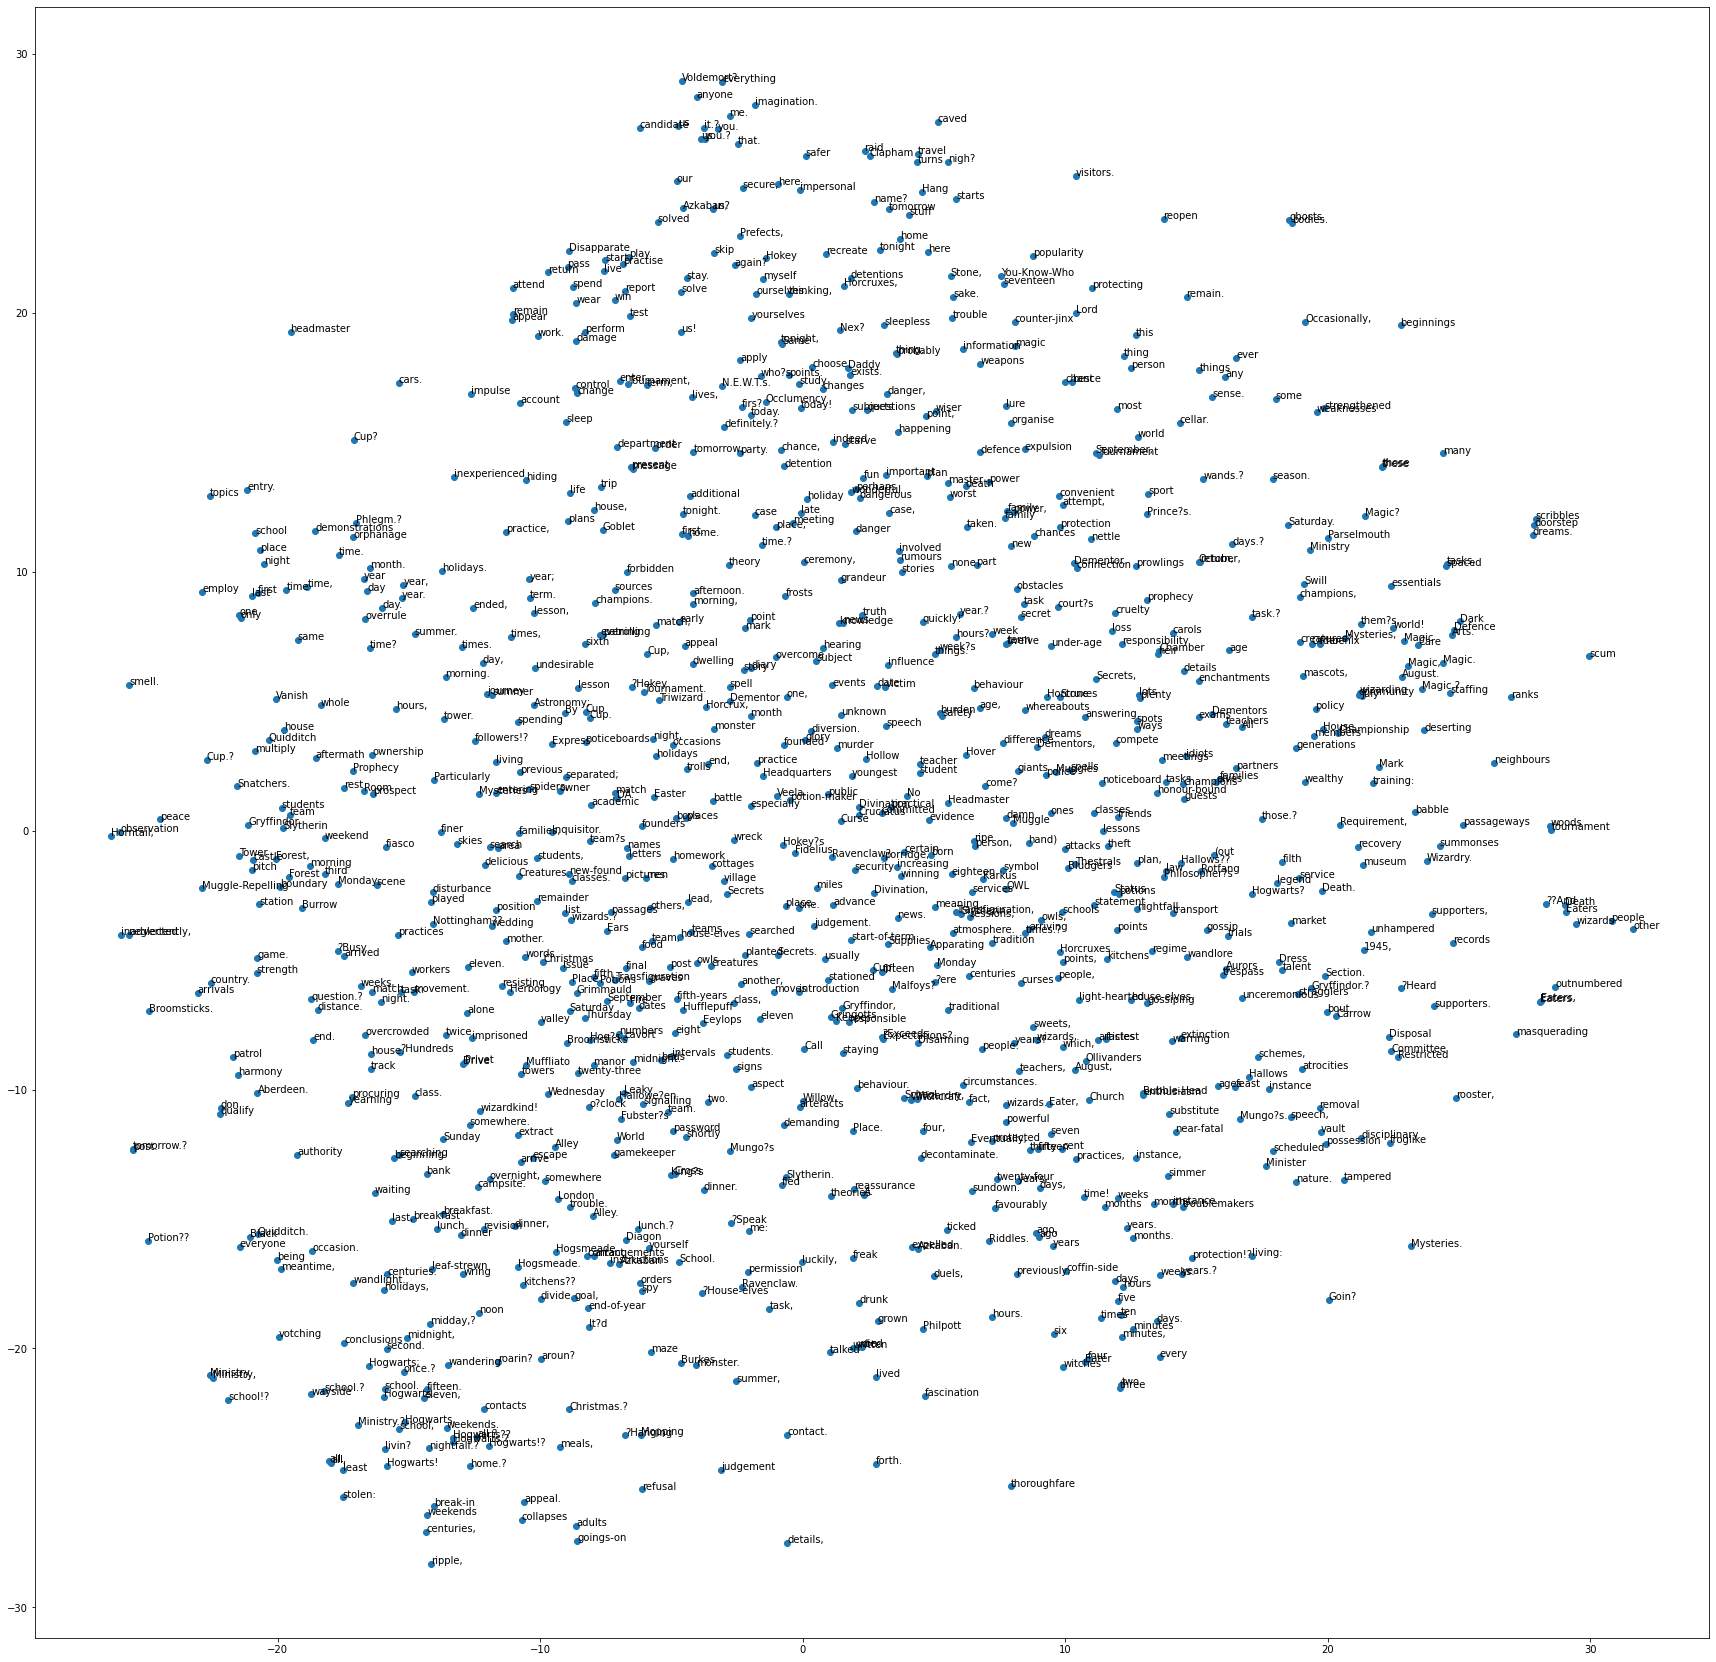

In [15]:
plt.figure(figsize=(30,30))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))